## Loan Prediction Dataset

In [286]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [287]:
# To load the train dataset
loan_train=pd.read_csv('/content/train_ctrUa4K.csv')

In [288]:
# To load the test dataset
loan_test=pd.read_csv('/content/test_lAUu6dG.csv')

# EDA for the given Loan Train dataset

In [289]:
# display the top entries of the dataset
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [290]:
# to check for basic information
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [291]:
# for statistical information
loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [292]:
loan_train.skew()

<ipython-input-292-6bdb0bbbe31a>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  loan_train.skew()


ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

In [293]:
# to check for null values
loan_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [294]:
# to check for unique entries
loan_train.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [295]:
loan_train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [296]:
# replacing 3+ with 3 for better results
loan_train['Dependents'].replace('3+',3,inplace=True)

In [297]:
loan_train['Dependents'].value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [298]:
loan_train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

It is a highly skewed distribution and hence will use median to fill the missing numerical values. For object data type , will use mode to fill the missing values.

In [299]:
# fill missing values in object data type
loan_train['Gender']=loan_train['Gender'].fillna(loan_train['Gender'].mode()[0])
loan_train['Married']=loan_train['Married'].fillna(loan_train['Married'].mode()[0])
loan_train['Dependents']=loan_train['Dependents'].fillna(loan_train['Dependents'].mode()[0])
loan_train['Self_Employed']=loan_train['Self_Employed'].fillna(loan_train['Self_Employed'].mode()[0])

In [300]:
loan_train.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

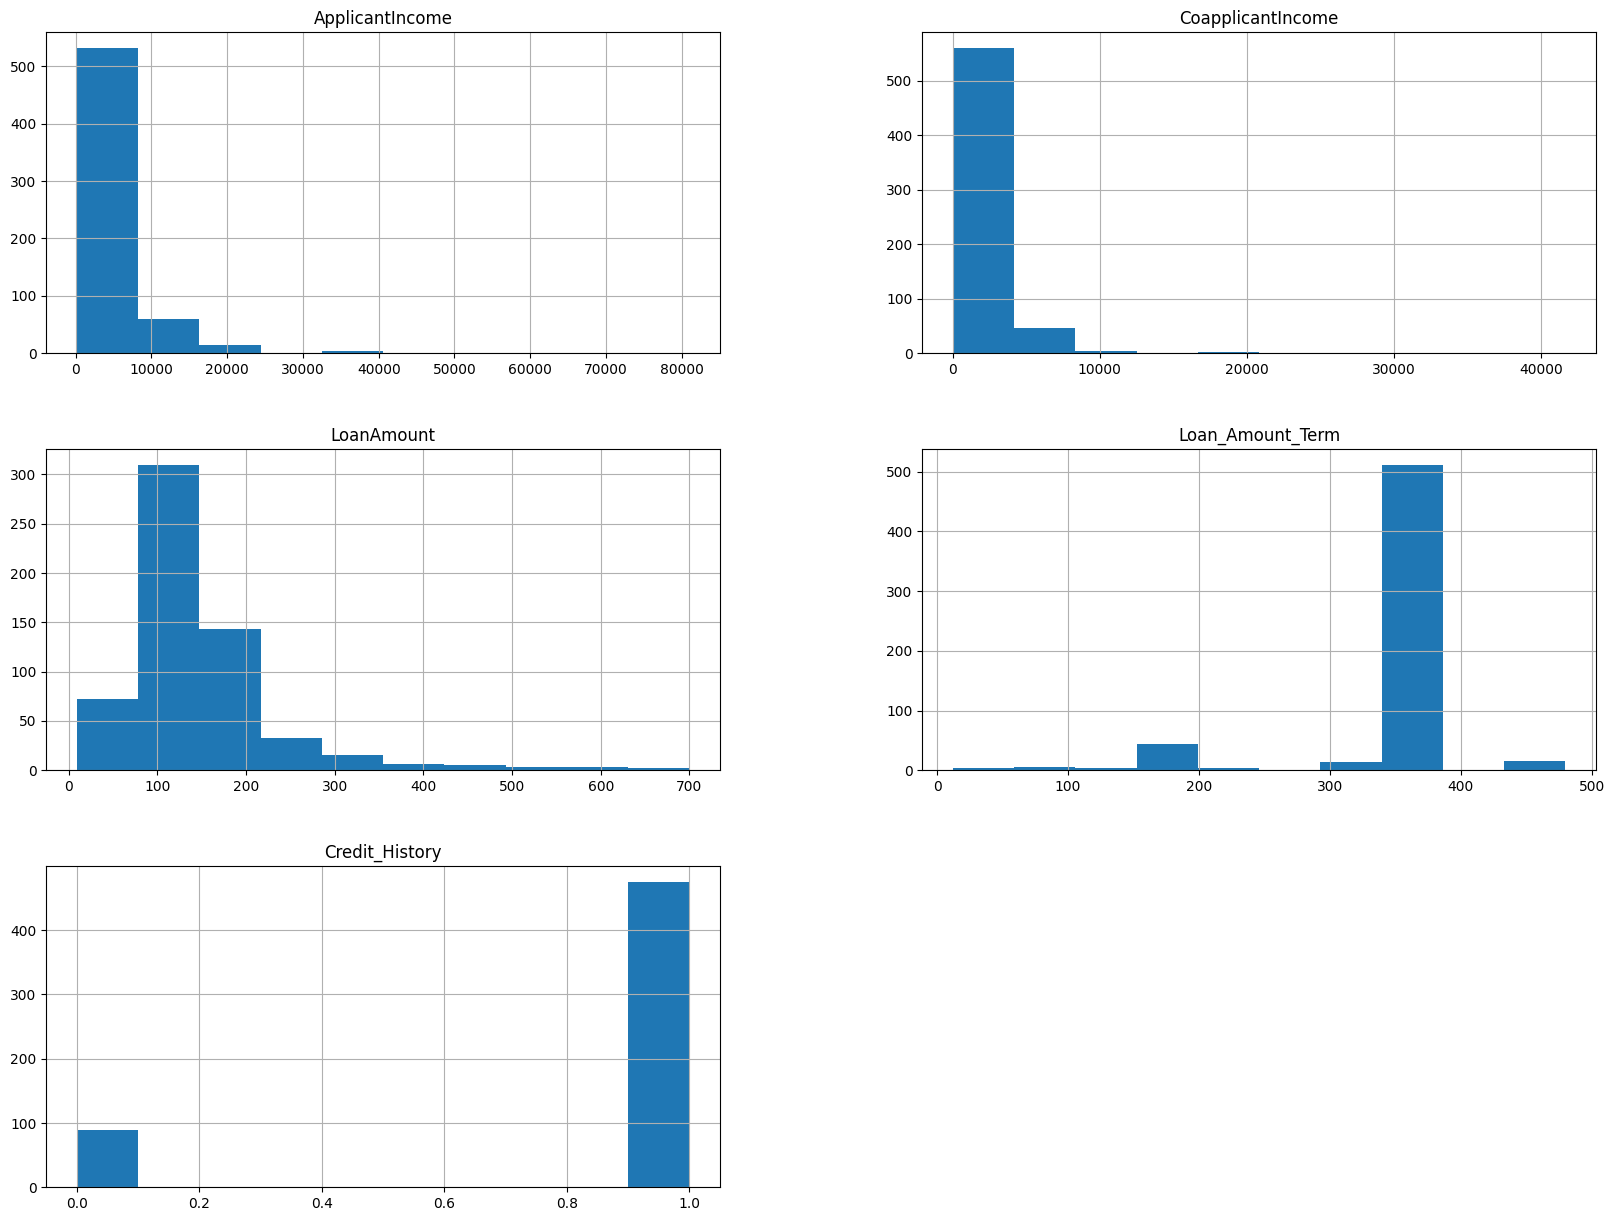

In [301]:
# histogram plot to view the spread in the numerical variables
loan_train.hist(figsize=(20,15))
plt.show()

Using median values to fill missing values

In [302]:
# filling missing numerical datatype with median values
loan_train['LoanAmount']=loan_train['LoanAmount'].fillna(loan_train['LoanAmount'].median())
loan_train['Loan_Amount_Term']=loan_train['Loan_Amount_Term'].fillna(loan_train['Loan_Amount_Term'].median())
loan_train['Credit_History']=loan_train['Credit_History'].fillna(loan_train['Credit_History'].median())

In [303]:
loan_train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [304]:
# to check the correlation of numerical variables
loan_train.corr()

<ipython-input-304-cddd3abfe764>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  loan_train.corr()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000


<ipython-input-305-28b86888395a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(loan_train.corr(),annot=True,cmap='BuPu')


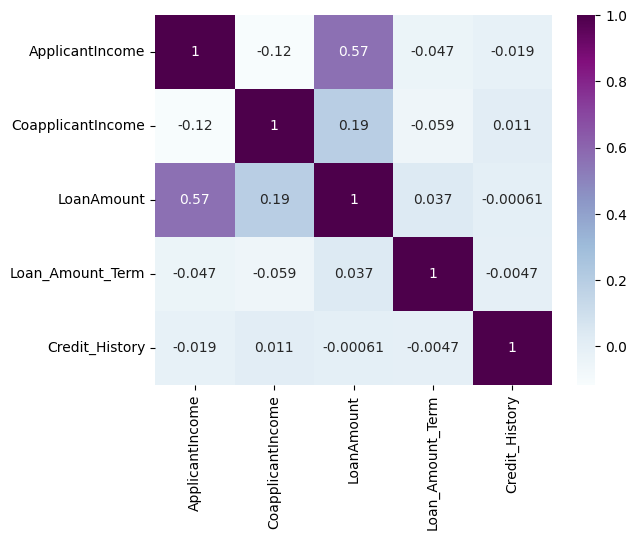

In [305]:
sns.heatmap(loan_train.corr(),annot=True,cmap='BuPu')
plt.show()

Applicant Income, Co-applicant Income and Loan Amount Term has a positive correlation with Loan Amount

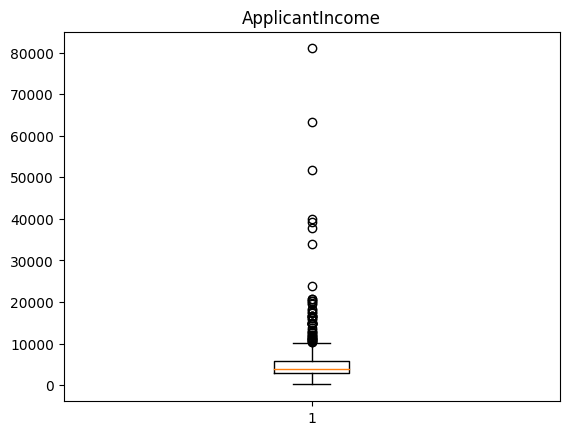

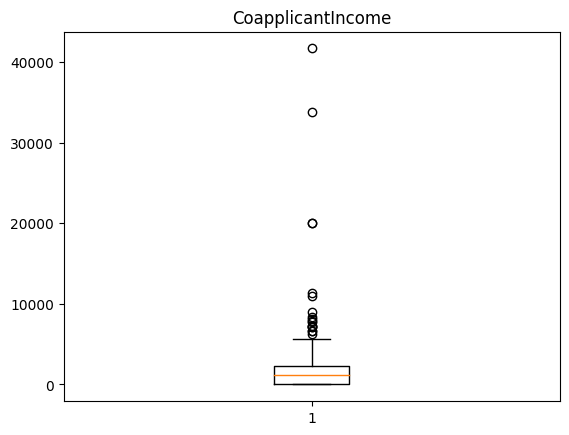

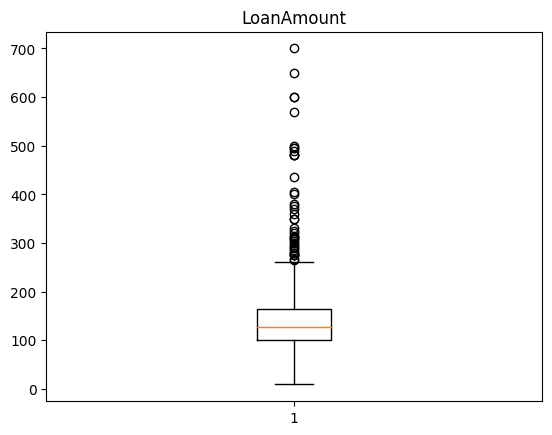

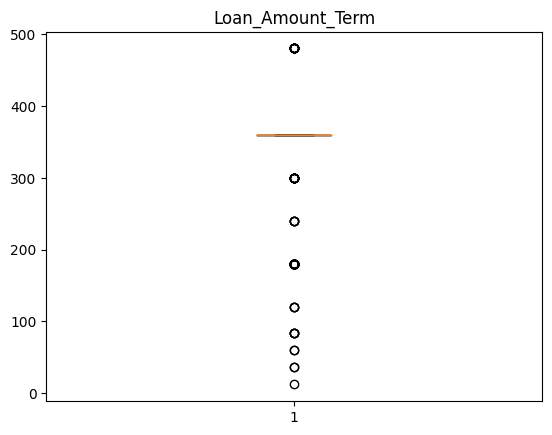

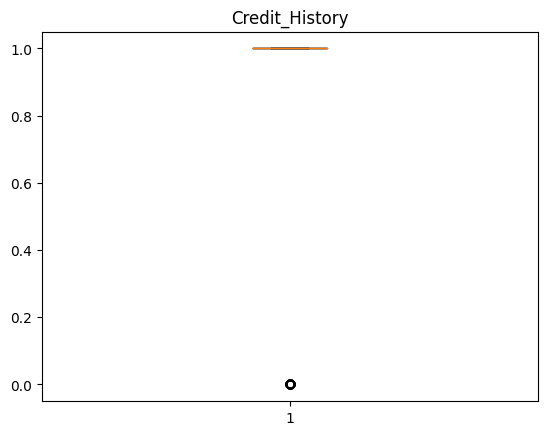

In [306]:
# using boxplot to check for any outliers
num_columns=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
for i in num_columns:
  plt.figure()
  plt.boxplot(loan_train[i])
  plt.title(i);

There are many outliers and hence using IQR method to handle the outliers in each category except credit history

In [307]:
# to treat outliers using IQR method
q1=np.percentile(loan_train['LoanAmount'],25,method='midpoint')
q3=np.percentile(loan_train['LoanAmount'],75,method='midpoint')
IQR=q3-q1
low_lim=q1-1.5*IQR
up_lim=q3+1.5*IQR
outliers=[]
for x in loan_train['LoanAmount']:
  if ((x<low_lim) or (x>up_lim)):
   outliers.append(x)

print(outliers)

[267.0, 349.0, 315.0, 320.0, 286.0, 312.0, 265.0, 370.0, 650.0, 290.0, 600.0, 275.0, 700.0, 495.0, 280.0, 279.0, 304.0, 330.0, 436.0, 480.0, 300.0, 376.0, 490.0, 308.0, 570.0, 380.0, 296.0, 275.0, 360.0, 405.0, 500.0, 480.0, 311.0, 480.0, 400.0, 324.0, 600.0, 275.0, 292.0, 350.0, 496.0]


In [308]:
print(q3,q1,IQR)

164.5 100.5 64.0


In [309]:
loan_train['LoanAmount']=loan_train['LoanAmount'].clip(lower=low_lim,upper=up_lim)
outliers=[]
for x in loan_train['LoanAmount']:
  if ((x<low_lim) or (x>up_lim)):
   outliers.append(x)

print(outliers)

[]


In [310]:
q1=np.percentile(loan_train['ApplicantIncome'],25,method='midpoint')
q3=np.percentile(loan_train['ApplicantIncome'],75,method='midpoint')
IQR=q3-q1
low_lim=q1-1.5*IQR
up_lim=q3+1.5*IQR
outliers=[]
for x in loan_train['ApplicantIncome']:
  if ((x<low_lim) or (x>up_lim)):
   outliers.append(x)

print(outliers)

[12841, 12500, 11500, 10750, 13650, 11417, 14583, 10408, 23803, 10513, 20166, 14999, 11757, 14866, 39999, 51763, 33846, 39147, 12000, 11000, 16250, 14683, 11146, 14583, 20667, 20233, 15000, 63337, 19730, 15759, 81000, 14880, 12876, 10416, 37719, 16692, 16525, 16667, 10833, 18333, 17263, 20833, 13262, 17500, 11250, 18165, 19484, 16666, 16120, 12000]


In [311]:
print(q3,q1,IQR)

5790.0 2879.0 2911.0


In [312]:
loan_train['ApplicantIncome']=loan_train['ApplicantIncome'].clip(lower=low_lim,upper=up_lim)
outliers=[]
for x in loan_train['ApplicantIncome']:
  if ((x<low_lim) or (x>up_lim)):
   outliers.append(x)

print(outliers)

[]


In [313]:
q1=np.percentile(loan_train['CoapplicantIncome'],25,method='midpoint')
q3=np.percentile(loan_train['CoapplicantIncome'],75,method='midpoint')
IQR=q3-q1
low_lim=q1-1.5*IQR
up_lim=q3+1.5*IQR
outliers=[]
for x in loan_train['CoapplicantIncome']:
  if ((x<low_lim) or (x>up_lim)):
   outliers.append(x)

print(outliers)

[10968.0, 8106.0, 7210.0, 8980.0, 7750.0, 11300.0, 7250.0, 7101.0, 6250.0, 7873.0, 20000.0, 20000.0, 8333.0, 6667.0, 6666.0, 7166.0, 33837.0, 41667.0]


In [314]:
print(q3,q1,IQR)

2292.5 0.0 2292.5


In [315]:
loan_train['CoapplicantIncome']=loan_train['CoapplicantIncome'].clip(lower=low_lim,upper=up_lim)
outliers=[]
for x in loan_train['CoapplicantIncome']:
  if ((x<low_lim) or (x>up_lim)):
   outliers.append(x)

print(outliers)

[]


In [316]:
q1=np.percentile(loan_train['Loan_Amount_Term'],25,method='midpoint')
q3=np.percentile(loan_train['Loan_Amount_Term'],75,method='midpoint')
IQR=q3-q1
low_lim=q1-1.5*IQR
up_lim=q3+1.5*IQR
outliers=[]
for x in loan_train['Loan_Amount_Term']:
  if ((x<low_lim) or (x>up_lim)):
   outliers.append(x)

print(outliers)

[120.0, 240.0, 180.0, 180.0, 60.0, 300.0, 480.0, 300.0, 240.0, 180.0, 120.0, 180.0, 180.0, 480.0, 180.0, 180.0, 480.0, 120.0, 180.0, 180.0, 180.0, 180.0, 480.0, 300.0, 180.0, 480.0, 180.0, 300.0, 180.0, 180.0, 480.0, 180.0, 180.0, 60.0, 180.0, 180.0, 480.0, 180.0, 36.0, 180.0, 300.0, 480.0, 480.0, 84.0, 180.0, 180.0, 180.0, 180.0, 480.0, 300.0, 480.0, 300.0, 180.0, 180.0, 480.0, 180.0, 180.0, 180.0, 300.0, 300.0, 180.0, 240.0, 300.0, 300.0, 180.0, 180.0, 180.0, 180.0, 300.0, 84.0, 12.0, 480.0, 300.0, 180.0, 480.0, 180.0, 180.0, 36.0, 180.0, 480.0, 84.0, 84.0, 180.0, 240.0, 180.0, 180.0, 180.0, 180.0]


In [317]:
print(q3,q1,IQR)

360.0 360.0 0.0


In [318]:
loan_train['Loan_Amount_Term']=loan_train['Loan_Amount_Term'].clip(lower=low_lim,upper=up_lim)
outliers=[]
for x in loan_train['Loan_Amount_Term']:
  if ((x<low_lim) or (x>up_lim)):
   outliers.append(x)

print(outliers)

[]


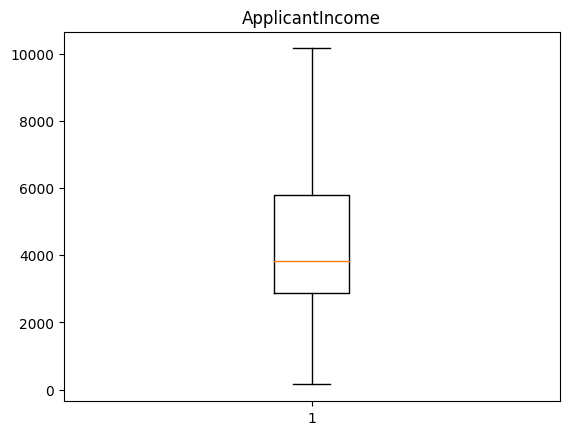

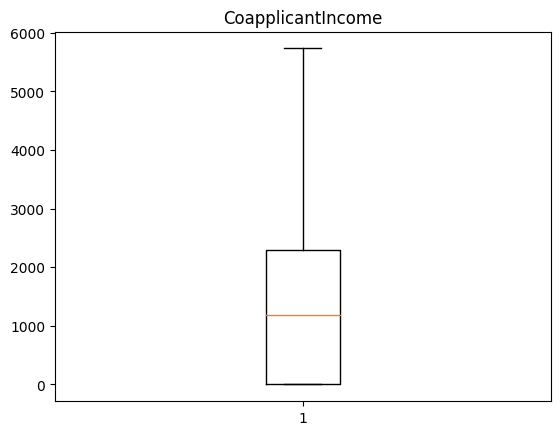

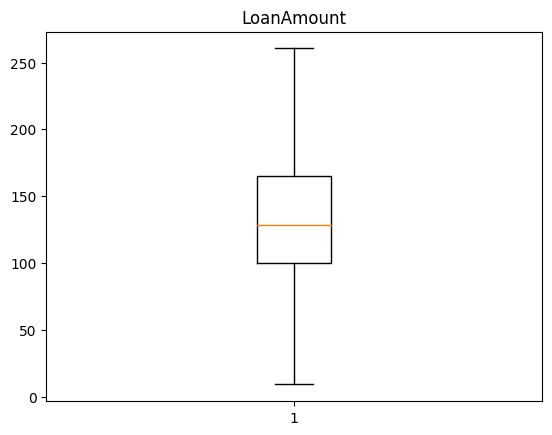

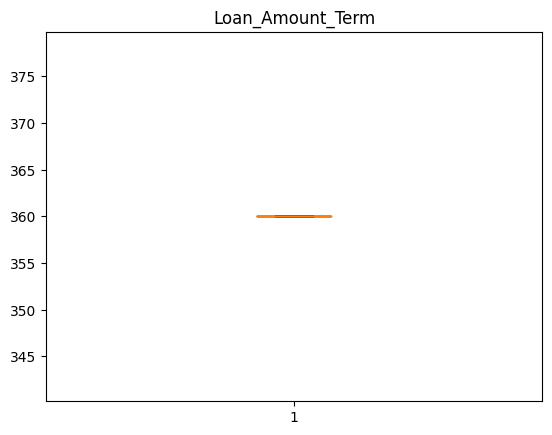

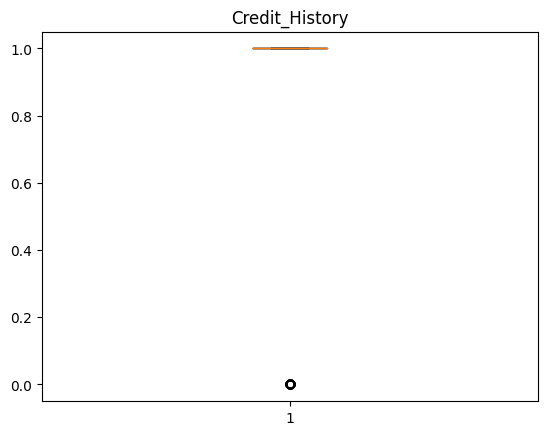

In [319]:
num_columns=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
for i in num_columns:
  plt.figure()
  plt.boxplot(loan_train[i])
  plt.title(i);

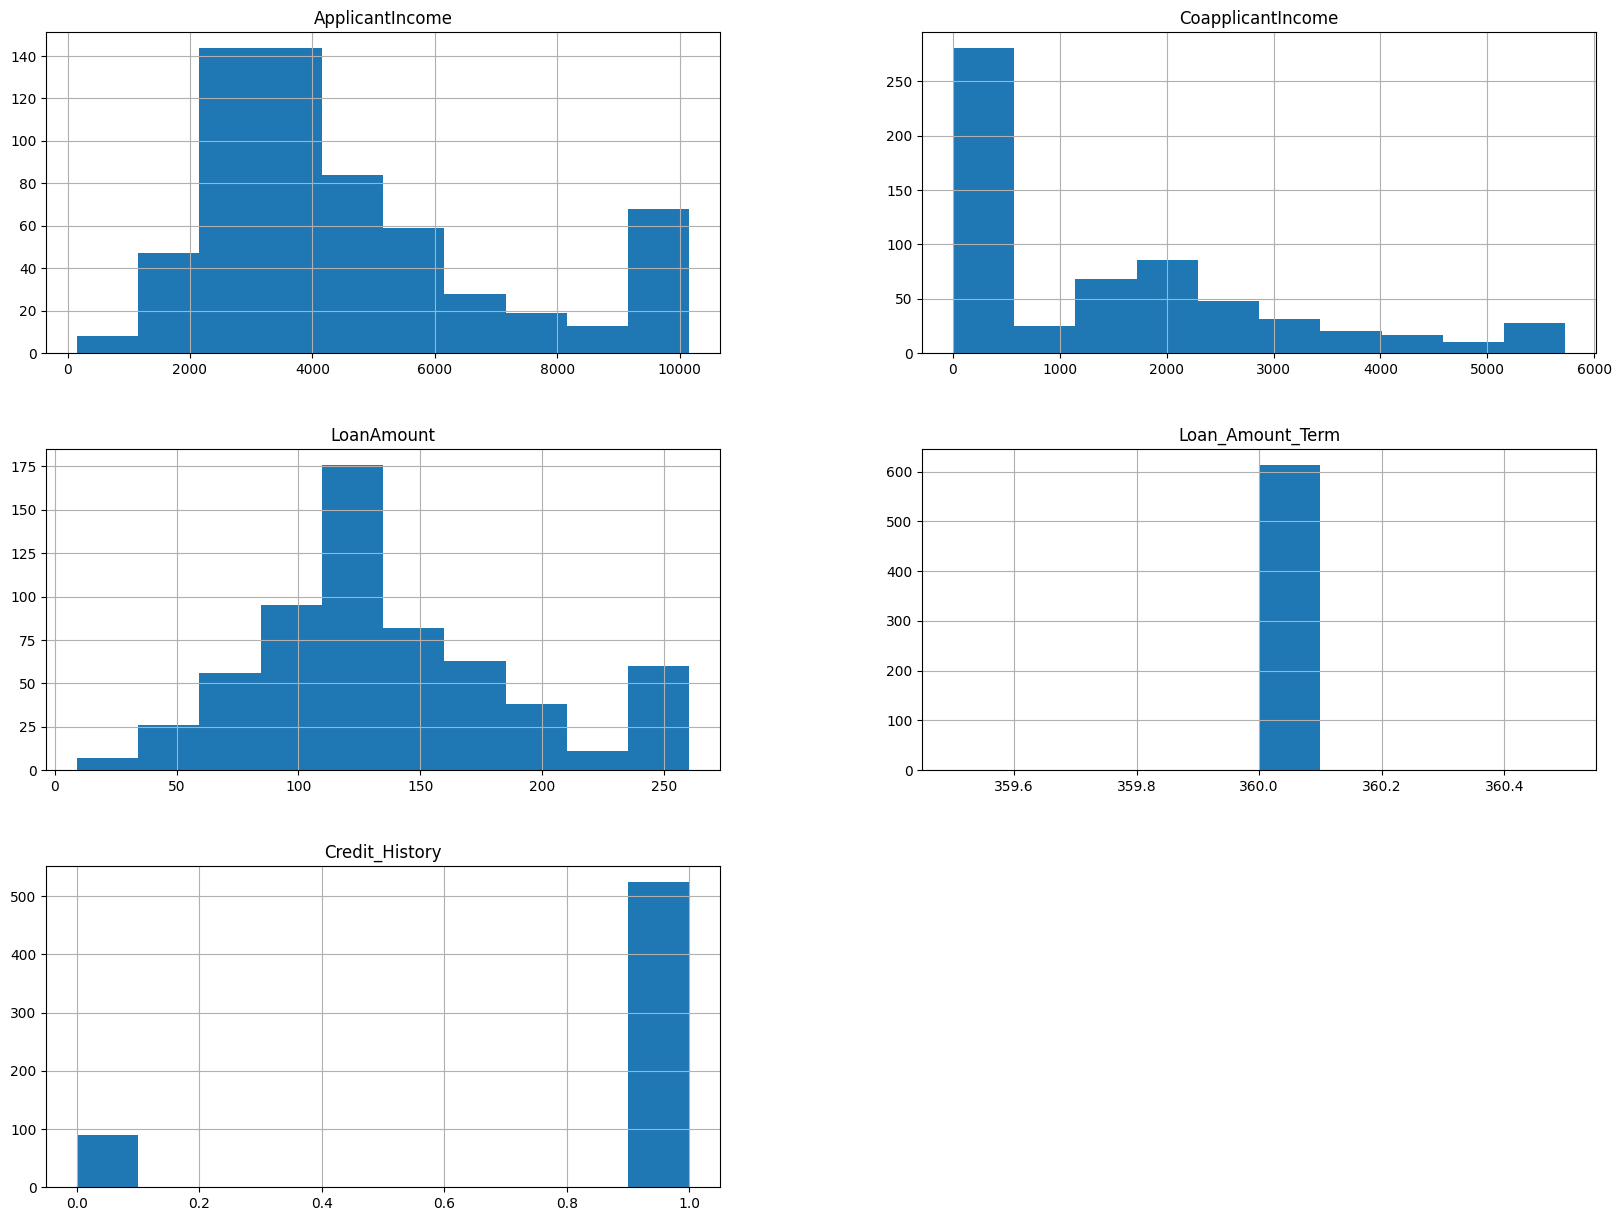

In [320]:
loan_train.hist(figsize=(20,15))
plt.show()

In [321]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


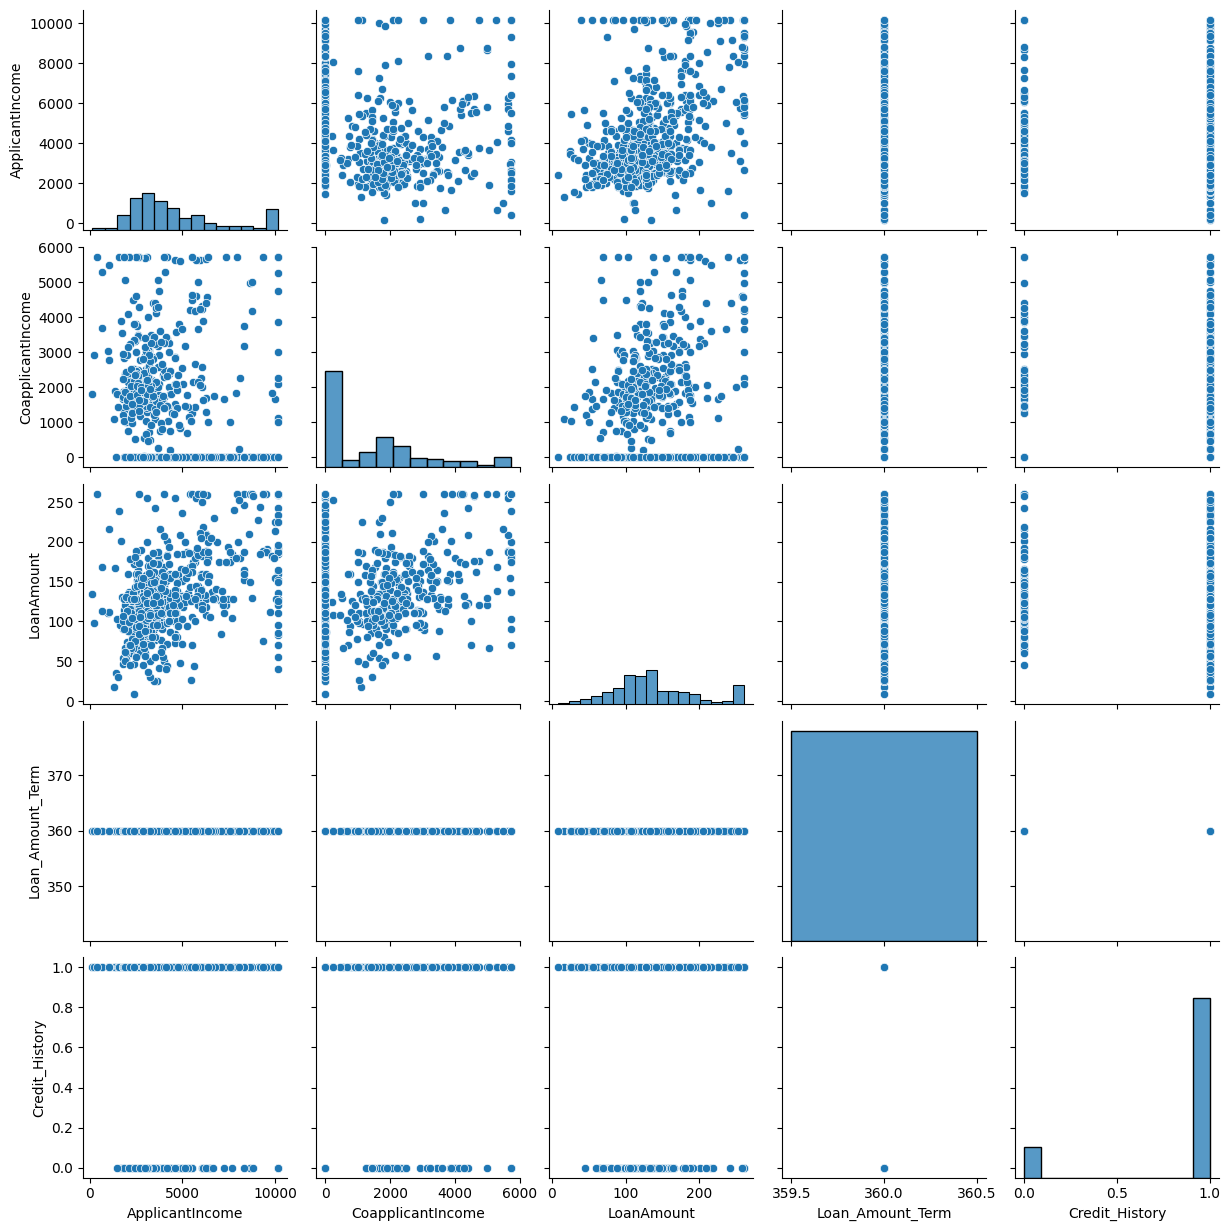

In [322]:
sns.pairplot(loan_train)
plt.show()

# Data Preprocessing

In [323]:
# encoding of categorical variables
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [324]:
loan_train['Gender']=le.fit_transform(loan_train['Gender'])
loan_train['Married']=le.fit_transform(loan_train['Married'])
loan_train['Education']=le.fit_transform(loan_train['Education'])
loan_train['Property_Area']=le.fit_transform(loan_train['Property_Area'])
loan_train['Self_Employed']=le.fit_transform(loan_train['Self_Employed'])
loan_train['Loan_Status']=le.fit_transform(loan_train['Loan_Status'])

In [325]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849.0,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1


# Modeling the loan_train dataset

Scaling the numerical variables


In [326]:
X=loan_train.drop(['Loan_ID','Loan_Status','Loan_Amount_Term'],axis=1)
y=loan_train['Loan_Status']

In [327]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
0,1,0,0,0,0,5849.0,0.0,128.0,1.0,2
1,1,1,1,0,0,4583.0,1508.0,128.0,1.0,0
2,1,1,0,0,1,3000.0,0.0,66.0,1.0,2
3,1,1,0,1,0,2583.0,2358.0,120.0,1.0,2
4,1,0,0,0,0,6000.0,0.0,141.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900.0,0.0,71.0,1.0,0
610,1,1,3,0,0,4106.0,0.0,40.0,1.0,0
611,1,1,1,0,0,8072.0,240.0,253.0,1.0,2
612,1,1,2,0,0,7583.0,0.0,187.0,1.0,2


In [328]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [329]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_sc=sc.fit_transform(X)
X_sc=pd.DataFrame(X_sc)


In [330]:
X_sc

,0,1,2,3,4,5,6,7,8,9
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.498190,-0.874872,-0.167288,0.411733,1.223298
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.013296,0.054640,-0.167288,0.411733,-1.318513
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.652856,-0.874872,-1.282678,0.411733,1.223298
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.821331,0.578570,-0.311209,0.411733,1.223298
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.559196,-0.874872,0.066584,0.411733,1.223298
...,...,...,...,...,...,...,...,...,...,...
609,-2.117107,-1.372089,-0.737806,-0.528362,-0.392601,-0.693258,-0.874872,-1.192727,0.411733,-1.318513
610,0.472343,0.728816,2.236021,-0.528362,-0.392601,-0.206013,-0.874872,-1.750422,0.411733,-1.318513
611,0.472343,0.728816,0.253470,-0.528362,-0.392601,1.396320,-0.726939,2.081482,0.411733,1.223298
612,0.472343,0.728816,1.244745,-0.528362,-0.392601,1.198756,-0.874872,0.894131,0.411733,1.223298


In [331]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [332]:
X_train,X_test,y_train,y_test=train_test_split(X_sc,y,random_state=42,test_size=0.2)

In [333]:
y_train

83     0
90     1
227    1
482    1
464    0
      ..
71     1
106    1
270    1
435    1
102    1
Name: Loan_Status, Length: 491, dtype: int64

In [334]:
y_test

350    1
377    1
163    1
609    1
132    1
      ..
231    1
312    1
248    1
11     1
333    1
Name: Loan_Status, Length: 123, dtype: int64

In [335]:
y.dtype

dtype('int64')

Using Logistic Regression

In [336]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()

In [337]:
log_reg.fit(X_train,y_train)
log_pred=log_reg.predict(X_test)

In [338]:
X_test

,0,1,2,3,4,5,6,7,8,9
350,0.472343,0.728816,-0.737806,-0.528362,-0.392601,1.804782,-0.874872,1.631728,0.411733,-0.047607
377,0.472343,0.728816,-0.737806,-0.528362,-0.392601,-0.123593,-0.874872,-0.131308,0.411733,-0.047607
163,0.472343,0.728816,1.244745,-0.528362,-0.392601,-0.181368,0.017041,0.372417,0.411733,-1.318513
609,-2.117107,-1.372089,-0.737806,-0.528362,-0.392601,-0.693258,-0.874872,-1.192727,0.411733,-1.318513
132,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,-0.766789,-0.874872,-1.210717,0.411733,-0.047607
...,...,...,...,...,...,...,...,...,...,...
231,0.472343,0.728816,-0.737806,-0.528362,-0.392601,-0.363579,-0.874872,-1.714442,0.411733,-1.318513
312,-2.117107,-1.372089,-0.737806,-0.528362,-0.392601,-0.852037,-0.874872,-1.462579,0.411733,-1.318513
248,0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.700530,0.261130,-0.257239,0.411733,-0.047607
11,0.472343,0.728816,1.244745,-0.528362,-0.392601,-0.854865,0.259281,-0.509101,0.411733,1.223298


In [339]:
log_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [340]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [341]:
confusion_matrix(y_test,log_pred)

array([[18, 25],
       [ 1, 79]])

In [342]:
print('Accuracy:',accuracy_score(y_test,log_pred))
print('Precision:',precision_score(y_test,log_pred))
print('Recall:',recall_score(y_test,log_pred))
print('F1:',f1_score(y_test,log_pred))

Accuracy: 0.7886178861788617
Precision: 0.7596153846153846
Recall: 0.9875
F1: 0.8586956521739131


kNN method

In [343]:
# using kNN method
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)

In [344]:
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  classifier.fit(X_train,y_train)
  knn_pred=classifier.predict(X_test)
  accuracy=accuracy_score(y_test,knn_pred)
  metric_k.append(accuracy)

Text(0, 0.5, 'Metric K')

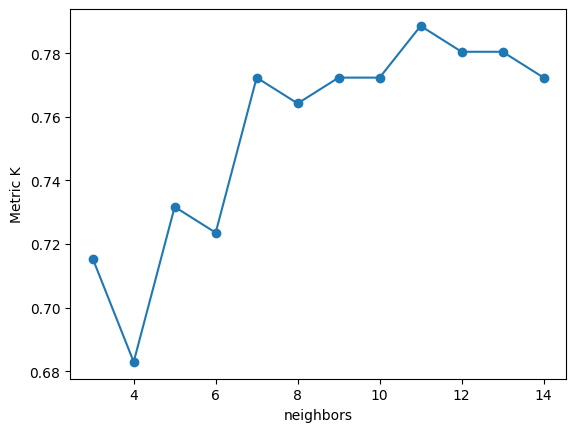

In [345]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('neighbors')
plt.ylabel('Metric K')

11 neighbours has higest metric

In [346]:
classifier=KNeighborsClassifier(n_neighbors=11,metric='minkowski',p=2)
classifier.fit(X_train,y_train)
knn_pred=classifier.predict(X_test)

In [347]:
confusion_matrix(y_test,knn_pred)

array([[18, 25],
       [ 1, 79]])

In [348]:
print('Accuracy:',accuracy_score(y_test,knn_pred))
print('Precision:',precision_score(y_test,knn_pred))
print('Recall:',recall_score(y_test,knn_pred))
print('F1:',f1_score(y_test,knn_pred))

Accuracy: 0.7886178861788617
Precision: 0.7596153846153846
Recall: 0.9875
F1: 0.8586956521739131


In [349]:
knn_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Using SVM method

In [350]:
from sklearn.svm import SVC
sv_clf=SVC()
sv_clf.fit(X_train,y_train)

SVC()

In [351]:
y_pred=sv_clf.predict(X_test)

In [352]:
print('Accuracy is:',accuracy_score(y_test,y_pred))

Accuracy is: 0.7886178861788617


In [353]:
print(confusion_matrix(y_test,y_pred))

[[18 25]
 [ 1 79]]


Fine Tuning - SVM method

In [354]:
sv_clf=SVC(kernel='poly')
sv_clf.fit(X_train,y_train)

SVC(kernel='poly')

In [355]:
y_pred=sv_clf.predict(X_test)

In [356]:
print('Accuracy is:',accuracy_score(y_test,y_pred))

Accuracy is: 0.7804878048780488


In [357]:
print(confusion_matrix(y_test,y_pred))

[[18 25]
 [ 2 78]]


Using Decision Tree Classifier

In [358]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train,y_train)
y_pred=dt_clf.predict(X_test)

In [359]:
print('Accuracy is:',accuracy_score(y_test,y_pred))

Accuracy is: 0.6991869918699187


In [360]:
print(confusion_matrix(y_test,y_pred))

[[21 22]
 [15 65]]


Using Random Forest Classifier

In [361]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [362]:
y_pred=rf_clf.predict(X_test)

In [363]:
print('Accuracy is:',accuracy_score(y_test,y_pred))


Accuracy is: 0.7723577235772358


In [364]:
print(confusion_matrix(y_test,y_pred))

[[19 24]
 [ 4 76]]


Hyper Parameter Tuning

In [365]:
rf_clf1=RandomForestClassifier(n_estimators=20,max_depth=20,criterion='entropy',min_samples_split=3)
rf_clf1.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=3,
                       n_estimators=20)

In [366]:
y_pred=rf_clf1.predict(X_test)

In [367]:
print('Accuracy is:',accuracy_score(y_test,y_pred))

Accuracy is: 0.7886178861788617


In [368]:
print(confusion_matrix(y_test,y_pred))

[[19 24]
 [ 2 78]]


In [369]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

Both Logistic Regression and Random Forest Classifier with hyper parameter tuning has given good accuracy and hence will use both these models for test predictions

# Analyse Loan Test Dataset for preprocessing and for predictions

In [370]:
# view Loan Test Dataset
loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# EDA and preprocessing of Loan Test Dataset

In [371]:
loan_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [372]:
loan_test.skew()

<ipython-input-372-28480d2fea1e>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  loan_test.skew()


ApplicantIncome      8.441375
CoapplicantIncome    4.257357
LoanAmount           2.223512
Loan_Amount_Term    -2.679318
Credit_History      -1.722379
dtype: float64

In [373]:
loan_test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [374]:
loan_test['Gender']=loan_test['Gender'].fillna(loan_test['Gender'].mode()[0])
loan_test['Dependents']=loan_test['Dependents'].fillna(loan_test['Dependents'].mode()[0])
loan_test['Self_Employed']=loan_test['Self_Employed'].fillna(loan_test['Self_Employed'].mode()[0])

In [375]:
loan_test['LoanAmount']=loan_test['LoanAmount'].fillna(loan_test['LoanAmount'].median())
loan_test['Loan_Amount_Term']=loan_test['Loan_Amount_Term'].fillna(loan_test['Loan_Amount_Term'].median())
loan_test['Credit_History']=loan_test['Credit_History'].fillna(loan_test['Credit_History'].median())

In [376]:
loan_test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [377]:
loan_test.corr()

<ipython-input-377-7e2d4d7b6e20>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  loan_test.corr()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.110335,0.488737,0.023319,0.094944
CoapplicantIncome,-0.110335,1.000000,0.150034,-0.008633,-0.058004
LoanAmount,0.488737,0.150034,1.000000,0.091867,-0.012932
Loan_Amount_Term,0.023319,-0.008633,0.091867,1.000000,-0.048189
Credit_History,0.094944,-0.058004,-0.012932,-0.048189,1.000000


<ipython-input-378-f59a2e16fe92>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(loan_test.corr(),annot=True)


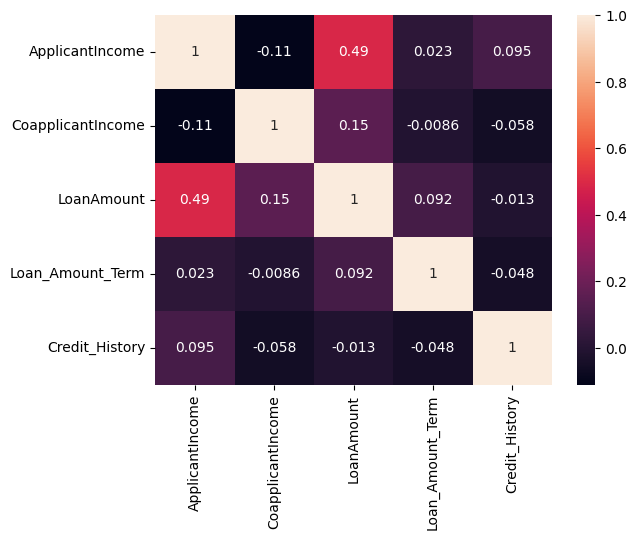

In [378]:
sns.heatmap(loan_test.corr(),annot=True)
plt.show()

In [379]:
loan_test['Dependents'].replace('3+',3,inplace=True)

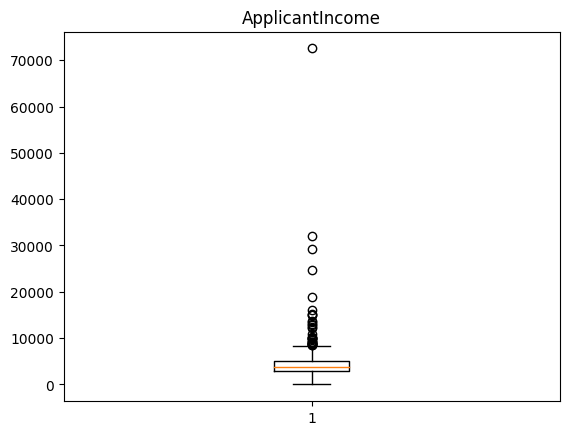

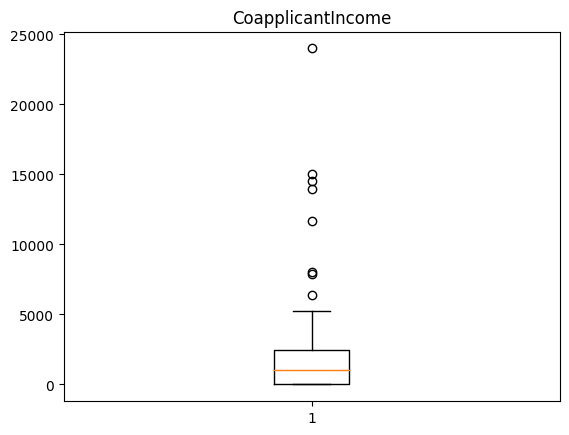

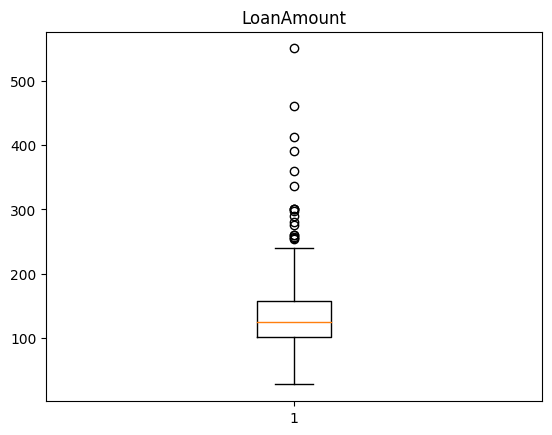

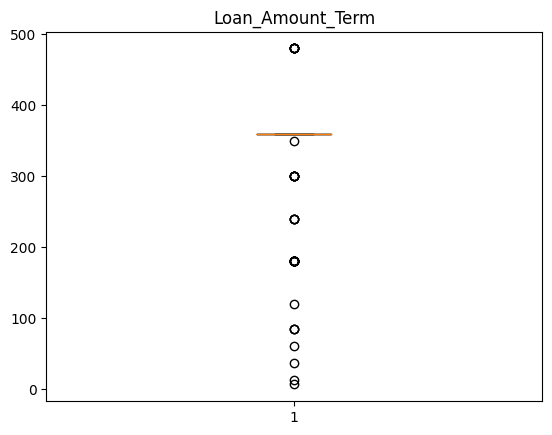

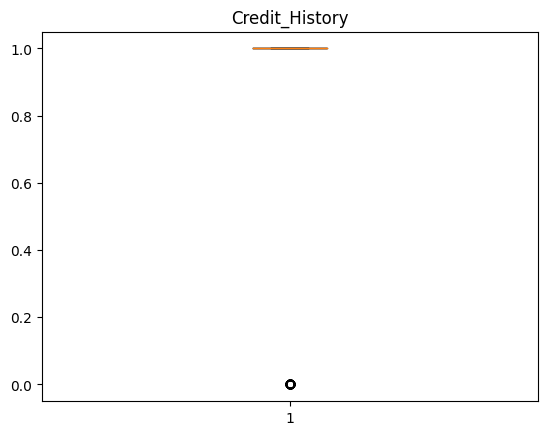

In [380]:
num_columns=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
for i in num_columns:
  plt.figure()
  plt.boxplot(loan_test[i])
  plt.title(i);

Handle outliers for test dataset

In [381]:
q1=np.percentile(loan_test['ApplicantIncome'],25,method='midpoint')
q3=np.percentile(loan_test['ApplicantIncome'],75,method='midpoint')
IQR=q3-q1
low_lim=q1-1.5*IQR
up_lim=q3+1.5*IQR
outliers=[]
for x in loan_test['ApplicantIncome']:
  if ((x<low_lim) or (x>up_lim)):
   outliers.append(x)

print(outliers)

[13633, 12173, 9226, 72529, 8449, 13518, 9719, 12500, 32000, 10890, 12941, 8703, 15312, 10166, 9167, 13083, 10000, 8706, 14911, 10000, 18840, 24797, 29167, 9000, 10000, 8750, 14987, 16000, 9699, 8667, 8550, 9200]


In [382]:
print(q3,q1,IQR)

5060.0 2864.0 2196.0


In [383]:
loan_test['ApplicantIncome']=loan_test['ApplicantIncome'].clip(lower=low_lim,upper=up_lim)
outliers=[]
for x in loan_test['ApplicantIncome']:
  if ((x<low_lim) or (x>up_lim)):
   outliers.append(x)

print(outliers)

[]


In [384]:
q1=np.percentile(loan_test['CoapplicantIncome'],25,method='midpoint')
q3=np.percentile(loan_test['CoapplicantIncome'],75,method='midpoint')
IQR=q3-q1
low_lim=q1-1.5*IQR
up_lim=q3+1.5*IQR
outliers=[]
for x in loan_test['CoapplicantIncome']:
  if ((x<low_lim) or (x>up_lim)):
   outliers.append(x)

print(outliers)

[7916, 24000, 8000, 6414, 14507, 13983, 11666, 15000]


In [385]:
print(q3,q1,IQR)

2430.5 0.0 2430.5


In [386]:
loan_test['CoapplicantIncome']=loan_test['CoapplicantIncome'].clip(lower=low_lim,upper=up_lim)
outliers=[]
for x in loan_test['CoapplicantIncome']:
  if ((x<low_lim) or (x>up_lim)):
   outliers.append(x)

print(outliers)

[]


In [387]:
q1=np.percentile(loan_test['LoanAmount'],25,method='midpoint')
q3=np.percentile(loan_test['LoanAmount'],75,method='midpoint')
IQR=q3-q1
low_lim=q1-1.5*IQR
up_lim=q3+1.5*IQR
outliers=[]
for x in loan_test['LoanAmount']:
  if ((x<low_lim) or (x>up_lim)):
   outliers.append(x)

print(outliers)

[280.0, 300.0, 290.0, 275.0, 360.0, 257.0, 390.0, 256.0, 300.0, 550.0, 260.0, 336.0, 412.0, 460.0, 297.0, 300.0, 260.0, 254.0]


In [388]:
print(q3,q1,IQR)

157.5 101.0 56.5


In [389]:
loan_test['LoanAmount']=loan_test['LoanAmount'].clip(lower=low_lim,upper=up_lim)
outliers=[]
for x in loan_test['LoanAmount']:
  if ((x<low_lim) or (x>up_lim)):
   outliers.append(x)

print(outliers)

[]


In [390]:
q1=np.percentile(loan_test['Loan_Amount_Term'],25,method='midpoint')
q3=np.percentile(loan_test['Loan_Amount_Term'],75,method='midpoint')
IQR=q3-q1
low_lim=q1-1.5*IQR
up_lim=q3+1.5*IQR
outliers=[]
for x in loan_test['Loan_Amount_Term']:
  if ((x<low_lim) or (x>up_lim)):
   outliers.append(x)

print(outliers)

[240.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 60.0, 480.0, 180.0, 180.0, 480.0, 180.0, 180.0, 84.0, 240.0, 12.0, 300.0, 300.0, 350.0, 240.0, 180.0, 84.0, 480.0, 300.0, 36.0, 480.0, 300.0, 180.0, 480.0, 180.0, 180.0, 480.0, 300.0, 480.0, 180.0, 480.0, 84.0, 300.0, 180.0, 120.0, 6.0, 240.0, 180.0, 180.0, 300.0, 180.0, 180.0]


In [391]:
print(q3,q1,IQR)

360.0 360.0 0.0


In [392]:
loan_test['Loan_Amount_Term']=loan_test['Loan_Amount_Term'].clip(lower=low_lim,upper=up_lim)
outliers=[]
for x in loan_test['Loan_Amount_Term']:
  if ((x<low_lim) or (x>up_lim)):
   outliers.append(x)

print(outliers)

[]


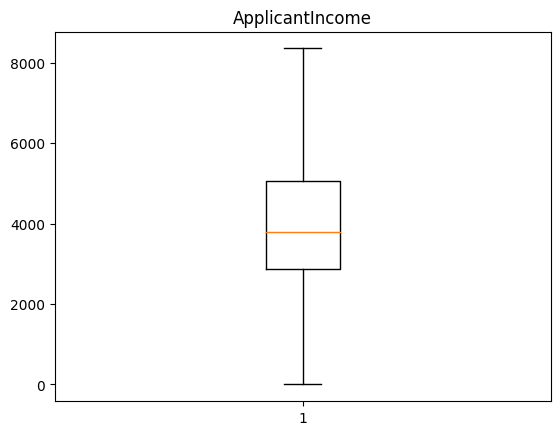

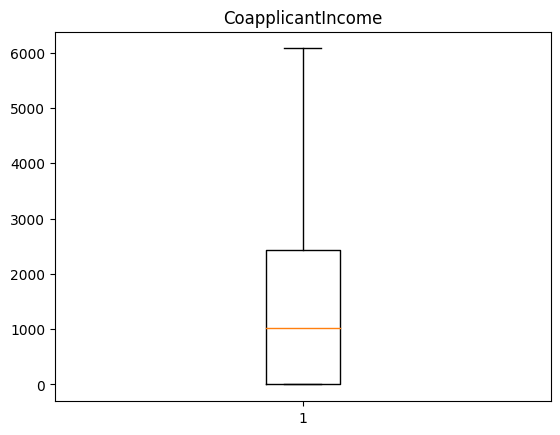

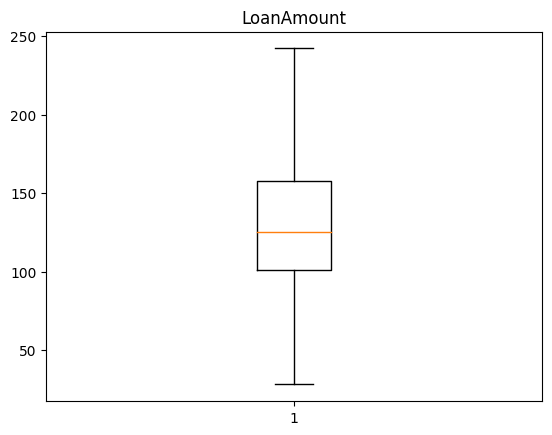

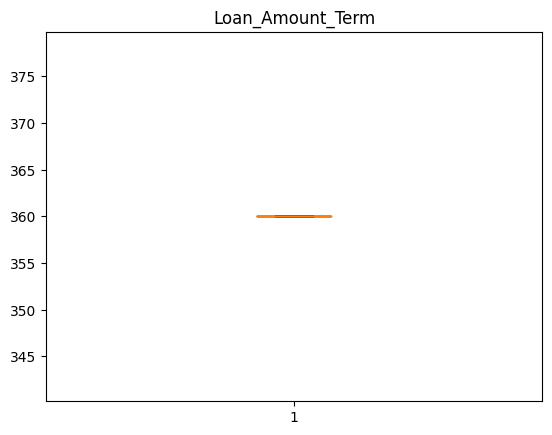

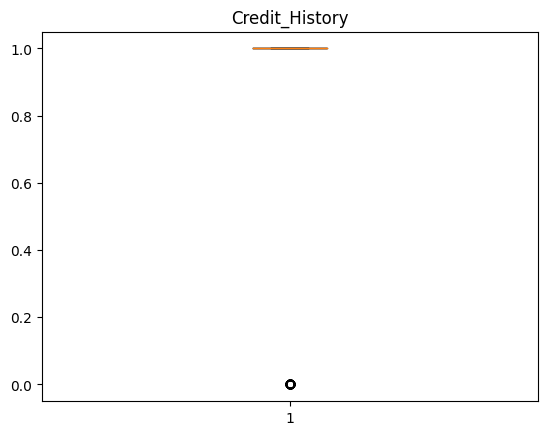

In [393]:
num_columns=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
for i in num_columns:
  plt.figure()
  plt.boxplot(loan_test[i])
  plt.title(i);

In [394]:
loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.0,Urban


In [395]:
loan_test['Gender']=le.fit_transform(loan_test['Gender'])
loan_test['Married']=le.fit_transform(loan_test['Married'])
loan_test['Education']=le.fit_transform(loan_test['Education'])
loan_test['Property_Area']=le.fit_transform(loan_test['Property_Area'])
loan_test['Self_Employed']=le.fit_transform(loan_test['Self_Employed'])

In [396]:
loan_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720,0.0,110.0,360.0,1.0,2
1,LP001022,1,1,1,0,0,3076,1500.0,126.0,360.0,1.0,2
2,LP001031,1,1,2,0,0,5000,1800.0,208.0,360.0,1.0,2
3,LP001035,1,1,2,0,0,2340,2546.0,100.0,360.0,1.0,2
4,LP001051,1,0,0,1,0,3276,0.0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1,1,3,1,1,4009,1777.0,113.0,360.0,1.0,2
363,LP002975,1,1,0,0,0,4158,709.0,115.0,360.0,1.0,2
364,LP002980,1,0,0,0,0,3250,1993.0,126.0,360.0,1.0,1
365,LP002986,1,1,0,0,0,5000,2393.0,158.0,360.0,1.0,0


In [397]:
X_scaled=loan_test.drop(['Loan_ID','Loan_Amount_Term'],axis=1)

In [398]:
X_scaled

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
0,1,1,0,0,0,5720,0.0,110.0,1.0,2
1,1,1,1,0,0,3076,1500.0,126.0,1.0,2
2,1,1,2,0,0,5000,1800.0,208.0,1.0,2
3,1,1,2,0,0,2340,2546.0,100.0,1.0,2
4,1,0,0,1,0,3276,0.0,78.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,4009,1777.0,113.0,1.0,2
363,1,1,0,0,0,4158,709.0,115.0,1.0,2
364,1,0,0,0,0,3250,1993.0,126.0,1.0,1
365,1,1,0,0,0,5000,2393.0,158.0,1.0,0


In [399]:
Scaled_X=sc.fit_transform(X_scaled)
Scaled_X=pd.DataFrame(Scaled_X)

In [400]:
Scaled_X

,0,1,2,3,4,5,6,7,8,9
0,0.485479,0.758358,-0.758222,-0.544812,-0.334845,0.760162,-0.892107,-0.468560,0.437674,1.118764
1,0.485479,0.758358,0.181871,-0.544812,-0.334845,-0.596907,0.046623,-0.127134,0.437674,1.118764
2,0.485479,0.758358,1.121964,-0.544812,-0.334845,0.390612,0.234369,1.622677,0.437674,1.118764
3,0.485479,0.758358,1.121964,-0.544812,-0.334845,-0.974669,0.701230,-0.681952,0.437674,1.118764
4,0.485479,-1.318638,-0.758222,1.835497,-0.334845,-0.494255,-0.892107,-1.151413,0.437674,1.118764
...,...,...,...,...,...,...,...,...,...,...
362,0.485479,0.758358,2.062056,1.835497,2.986456,-0.118032,0.219975,-0.404543,0.437674,1.118764
363,0.485479,0.758358,-0.758222,-0.544812,-0.334845,-0.041556,-0.448401,-0.361864,0.437674,1.118764
364,0.485479,-1.318638,-0.758222,-0.544812,-0.334845,-0.507600,0.355152,-0.127134,0.437674,-0.095989
365,0.485479,0.758358,-0.758222,-0.544812,-0.334845,0.390612,0.605480,0.555719,0.437674,-1.310741


Scaled_X will be the input for predictions in the models

In [418]:
# using Logistic Regression
log_reg.fit(X_train,y_train)
log_predLR=log_reg.predict(Scaled_X)

In [419]:
log_predLR

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [403]:
# using SVM
y_predSVM=sv_clf.predict(Scaled_X)

In [404]:
y_predSVM

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [405]:
# using Hyper Tuned Random Forest Classifier
y_predRF=rf_clf1.predict(Scaled_X)

In [406]:
y_predRF

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,

In [407]:
y_predRF.dtype

dtype('int64')

In [420]:
sample=pd.read_csv('/content/sample_submission_49d68Cx.csv')

In [421]:
sample.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [422]:
sample['Loan_Status']=log_predLR

In [423]:
sample['Loan_Status']

0      1
1      1
2      1
3      1
4      1
      ..
362    1
363    1
364    1
365    1
366    1
Name: Loan_Status, Length: 367, dtype: int64

In [424]:
sample.isna().sum()

Loan_ID        0
Loan_Status    0
dtype: int64

In [413]:
sample['Loan_Status'].head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    0
8    1
9    1
Name: Loan_Status, dtype: int64

In [425]:
sample.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [426]:
sample.to_csv('sample_submission2.csv',index=False)